In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#scikit-learn
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_brut = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_Building_Energy_Nettoyage_v1.csv"
df = pd.read_csv(data_brut)

In [3]:
df = df.drop(columns="Unnamed: 0")

Attention au LargestPropertyUseType, LargestPropertyUseTypeGFA dans la suppression des NA

In [4]:
df = df.drop(columns=["OSEBuildingID","Latitude", "Longitude","ListOfAllPropertyUseTypes","ENERGYSTARScore"])

In [5]:
df = df.dropna()

In [6]:
print("Pourcentage de valeurs nulles: {}%".format(df.isna().mean().sum()))

Pourcentage de valeurs nulles: 0.0%


In [7]:
df.select_dtypes(include="object").columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'LargestPropertyUseType'],
      dtype='object')

In [8]:
df.select_dtypes(include=["int","float"]).columns

Index(['CouncilDistrictCode', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)'],
      dtype='object')

In [9]:
# Define categorical and numerical feature columns
categorical_cols = ['BuildingType',
                    'PrimaryPropertyType',
                    "Neighborhood",
                    "YearBuilt",
                    'LargestPropertyUseType',
                    #"SecondLargestPropertyUseType",
                    #"ThirdLargestPropertyUseType"
                    ]
numerical_cols = ['NumberofBuildings',
                  'NumberofFloors',
                  'PropertyGFATotal',
                  'PropertyGFAParking',
                  #'PropertyGFABuilding(s)',
                  #'LargestPropertyUseTypeGFA'
                  ]

In [10]:
X = df[categorical_cols + numerical_cols]
y = df["SiteEnergyUseWN(kBtu)"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# KNeighborsRegressor()

In [ ]:
tt = TransformedTargetRegressor(regressor=KNeighborsRegressor(),func=np.log, inverse_func=np.exp)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', tt)])

kfold = KFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {
    'model__n_neighbors': list(range(1, 30)),
}
# 'model__regressor?__n_neighbors': list(range(1, 30)), (vérifier ça !)

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

In [12]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', KNeighborsRegressor())])

kfold = KFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {
    'model__n_neighbors': list(range(1, 30)),
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 29 candidates, totalling 87 fits


0.5140016452460042
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'Ne

In [13]:
result = pd.DataFrame(grid_search.cv_results_)

In [14]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.011657,0.002169,0.044840,0.034277,1,{'model__n_neighbors': 1},0.425948,0.793036,0.267974,0.495653,0.219949,2,0.999998,1.000000,0.999999,0.999999,7.542690e-07
1,0.011769,0.004102,0.019716,0.001813,2,{'model__n_neighbors': 2},0.483065,0.806106,0.252835,0.514002,0.226929,1,0.859594,0.844536,0.887595,0.863908,1.784171e-02
2,0.013048,0.003562,0.021025,0.000099,3,{'model__n_neighbors': 3},0.414780,0.726591,0.087858,0.409743,0.260786,8,0.747506,0.691721,0.801570,0.746932,4.484781e-02
3,0.008983,0.000678,0.020950,0.002844,4,{'model__n_neighbors': 4},0.376859,0.657408,0.296850,0.443706,0.154601,5,0.660203,0.665906,0.785270,0.703793,5.765992e-02
4,0.007594,0.000109,0.017183,0.001950,5,{'model__n_neighbors': 5},0.431991,0.581125,0.406367,0.473161,0.077055,3,0.605355,0.574644,0.690097,0.623366,4.882382e-02
5,0.006065,0.000822,0.016783,0.001760,6,{'model__n_neighbors': 6},0.402242,0.547398,0.445933,0.465191,0.060804,4,0.579978,0.587568,0.619763,0.595770,1.724687e-02
6,0.007367,0.001076,0.017544,0.001652,7,{'model__n_neighbors': 7},0.374418,0.510478,0.367452,0.417449,0.065843,6,0.562860,0.549326,0.605296,0.572494,2.384330e-02
7,0.006253,0.000305,0.015248,0.002406,8,{'model__n_neighbors': 8},0.347654,0.486500,0.403689,0.412614,0.057034,7,0.535171,0.518555,0.563266,0.538998,1.845248e-02
8,0.008869,0.001586,0.019794,0.005099,9,{'model__n_neighbors': 9},0.327225,0.435786,0.412656,0.391889,0.046689,9,0.522471,0.500287,0.530096,0.517618,1.264414e-02
9,0.006655,0.000229,0.019392,0.001866,10,{'model__n_neighbors': 10},0.309001,0.411203,0.422988,0.381064,0.051183,10,0.501280,0.481898,0.499521,0.494233,8.751515e-03


In [15]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_kkn_result.csv", sep=";")

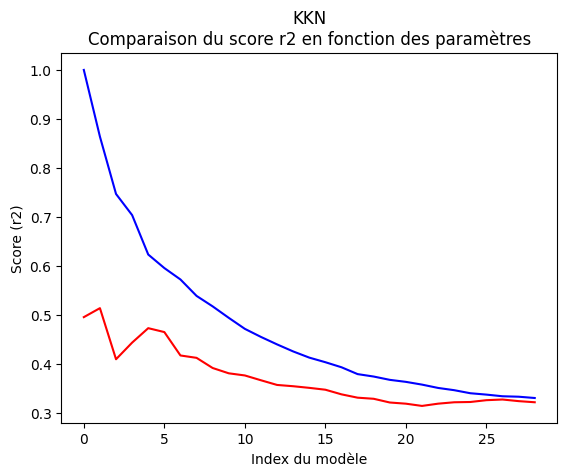

In [16]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("KKN\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_kkn_score.png", dpi=300)

# RandomForestRegressor

In [17]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor())])

param_grid = {
    'model__n_estimators': [100],          # Number of trees in the forest
    'model__max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'model__min_samples_split': [2, 5, 10],       # Minimum number of samples to split a node
    'model__min_samples_leaf': [1, 2, 4],         # Bootstrap Aggregating (Bagging)
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.6089412080081709
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BuildingType',
                                                   'PrimaryPropert

In [18]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.556693,0.110934,0.024998,0.001202,None,1,2,100,"{'model__max_depth': None, 'model__min_samples...",0.487720,0.717870,0.396355,0.533981,0.135273,20,0.936314,0.925262,0.924209,0.928595,0.005475
1,3.686489,0.189347,0.029275,0.002911,None,1,5,100,"{'model__max_depth': None, 'model__min_samples...",0.446583,0.626926,0.280329,0.451279,0.141536,34,0.878172,0.896861,0.880030,0.885021,0.008406
2,2.929914,0.225439,0.024917,0.000243,None,1,10,100,"{'model__max_depth': None, 'model__min_samples...",0.457572,0.622108,0.221120,0.433600,0.164578,36,0.855107,0.860408,0.875383,0.863633,0.008586
3,2.536028,0.090898,0.022172,0.000350,None,2,2,100,"{'model__max_depth': None, 'model__min_samples...",0.508454,0.760952,0.465162,0.578189,0.130436,5,0.835948,0.836622,0.848400,0.840323,0.005718
4,2.340653,0.085834,0.022350,0.002850,None,2,5,100,"{'model__max_depth': None, 'model__min_samples...",0.495903,0.754268,0.483824,0.577998,0.124739,7,0.807449,0.808388,0.837370,0.817735,0.013889
5,1.957455,0.040616,0.023186,0.002993,None,2,10,100,"{'model__max_depth': None, 'model__min_samples...",0.475796,0.723078,0.454521,0.551132,0.121895,15,0.771766,0.747392,0.799660,0.772939,0.021355
6,1.613193,0.041701,0.021841,0.002290,None,4,2,100,"{'model__max_depth': None, 'model__min_samples...",0.421453,0.575840,0.565603,0.520965,0.070490,25,0.691242,0.666511,0.678923,0.678892,0.010096
7,1.620043,0.052717,0.023509,0.000574,None,4,5,100,"{'model__max_depth': None, 'model__min_samples...",0.443716,0.581555,0.598174,0.541149,0.069228,18,0.709352,0.685808,0.694909,0.696690,0.009694
8,1.563164,0.076371,0.024371,0.004663,None,4,10,100,"{'model__max_depth': None, 'model__min_samples...",0.438256,0.604212,0.602944,0.548470,0.077935,16,0.697660,0.680616,0.662658,0.680311,0.014291
9,1.315099,0.082618,0.025923,0.007001,10,1,2,100,"{'model__max_depth': 10, 'model__min_samples_l...",0.470689,0.716658,0.274672,0.487340,0.180823,29,0.918100,0.919351,0.916441,0.917964,0.001192


In [19]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_RandomForest_result.csv", sep=";")

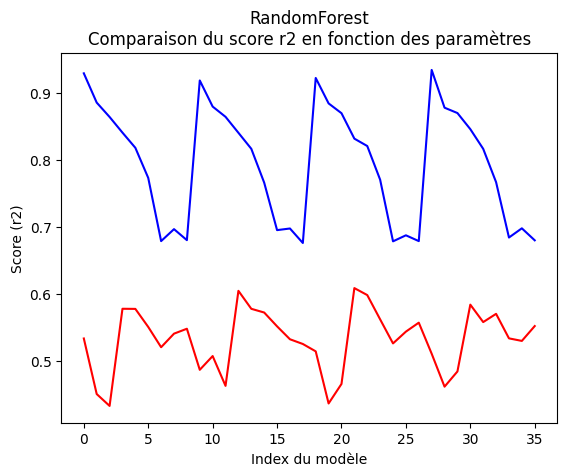

In [20]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("RandomForest\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_RandomForest_score.png", dpi=300)

# GradientBoostingRegressor()

In [21]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GradientBoostingRegressor())])

param_grid = {
    'model__n_estimators': [10, 100, 200],          # Number of trees in the forest
    'model__min_samples_split': [2, 5, 10],       # Minimum number of samples to split a node
    'model__min_samples_leaf': [1, 2, 4],
    #'model__learning_rate': [0.1, 0.01, 0.001],       # Bootstrap Aggregating (Bagging)
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.6825836031277858
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BuildingType',
                                                   'PrimaryProperty

In [22]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.058827,0.018841,0.010042,0.001332,1,2,10,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.454889,0.668453,0.525177,0.549506,0.088868,18,0.734507,0.776238,0.784623,0.765123,0.021918
1,0.394640,0.012308,0.012449,0.001076,1,2,100,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.623436,0.743238,0.526618,0.631098,0.088600,3,0.951451,0.968769,0.971130,0.963784,0.008773
2,0.830542,0.023108,0.015648,0.000807,1,2,200,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.573299,0.742083,0.555593,0.623658,0.084050,6,0.972571,0.983111,0.983365,0.979682,0.005030
3,0.054741,0.005398,0.011873,0.002056,1,5,10,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.381494,0.642817,0.327756,0.450689,0.137615,26,0.719689,0.770688,0.726259,0.738879,0.022652
4,0.437876,0.013262,0.014283,0.000954,1,5,100,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.606058,0.709131,0.399451,0.571547,0.128760,14,0.951237,0.967113,0.969121,0.962490,0.007999
5,0.922495,0.042546,0.013865,0.004013,1,5,200,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.607527,0.709136,0.423518,0.580061,0.118209,13,0.971488,0.980828,0.983016,0.978444,0.004999
6,0.058812,0.003147,0.010158,0.001627,1,10,10,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.372664,0.557450,0.343419,0.424511,0.094757,27,0.687967,0.731773,0.726259,0.715333,0.019481
7,0.486037,0.023382,0.011046,0.000636,1,10,100,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.573006,0.637981,0.456414,0.555800,0.075116,17,0.944517,0.958693,0.964157,0.955789,0.008277
8,0.895687,0.082368,0.011548,0.000416,1,10,200,"{'model__min_samples_leaf': 1, 'model__min_sam...",0.590621,0.637016,0.452725,0.560121,0.078267,16,0.963345,0.975547,0.978117,0.972336,0.006444
9,0.063546,0.003016,0.010895,0.000829,2,2,10,"{'model__min_samples_leaf': 2, 'model__min_sam...",0.399622,0.704820,0.599251,0.567898,0.126553,15,0.692756,0.692698,0.707817,0.697757,0.007114


In [23]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_GradienBoosting_result.csv", sep=";")

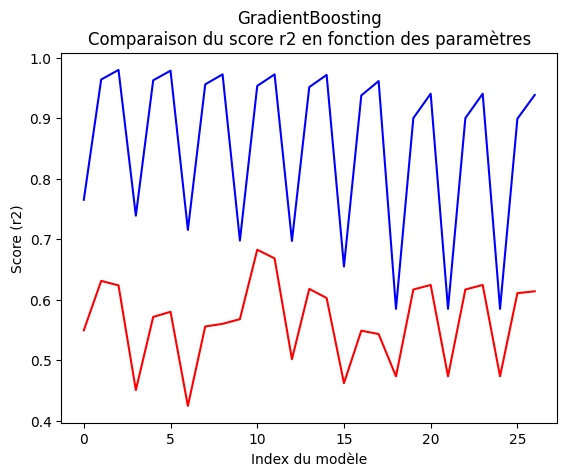

In [24]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("GradientBoosting\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_GradientBoosting_score.png", dpi=300)

# SVR

In [25]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', SVR())])

param_grid = {
    'model__C': [1, 100, 1e3, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10],
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.43341087656227373
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BuildingType',
                                                   'PrimaryProperty

In [26]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.086793,0.010656,0.030317,0.000493,1,{'model__C': 1},-0.065564,-0.075118,-0.075845,-0.072176,0.004685,9,-0.080038,-0.066384,-0.062123,-0.069515,0.007641
1,0.070116,0.002617,0.036325,0.002055,100,{'model__C': 100},-0.065511,-0.075020,-0.075691,-0.072074,0.004649,8,-0.079930,-0.066302,-0.062037,-0.069423,0.007631
2,0.084583,0.011745,0.030727,0.001809,1000.0,{'model__C': 1000.0},-0.065075,-0.074130,-0.074405,-0.071203,0.004335,7,-0.079040,-0.065564,-0.061325,-0.068643,0.007553
3,0.082351,0.002866,0.031901,0.003086,100000.0,{'model__C': 100000.0},-0.016739,0.002746,0.024133,0.003380,0.016692,6,0.012694,-0.000659,-0.005867,0.002056,0.007817
4,0.099869,0.005079,0.033469,0.000975,1000000.0,{'model__C': 1000000.0},0.090707,0.151674,0.239425,0.160602,0.061041,5,0.197669,0.148184,0.132410,0.159421,0.027801
5,0.216888,0.009424,0.035030,0.003379,10000000.0,{'model__C': 10000000.0},0.200985,0.285311,0.393107,0.293134,0.078628,4,0.431914,0.372374,0.322971,0.375753,0.044540
6,0.553095,0.034087,0.043504,0.002606,100000000.0,{'model__C': 100000000.0},0.314821,0.416628,0.487069,0.406172,0.070708,2,0.854613,0.804540,0.786158,0.815104,0.028928
7,0.888604,0.085547,0.036646,0.008108,1000000000.0,{'model__C': 1000000000.0},0.350372,0.462836,0.487024,0.433411,0.059542,1,0.999401,0.999601,0.999378,0.999460,0.000100
8,0.933172,0.113710,0.021103,0.000439,10000000000.0,{'model__C': 10000000000.0},0.339385,0.406477,0.443310,0.396390,0.043023,3,0.999918,0.999906,0.999889,0.999904,0.000012


In [27]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_SVR_result.csv", sep=";")

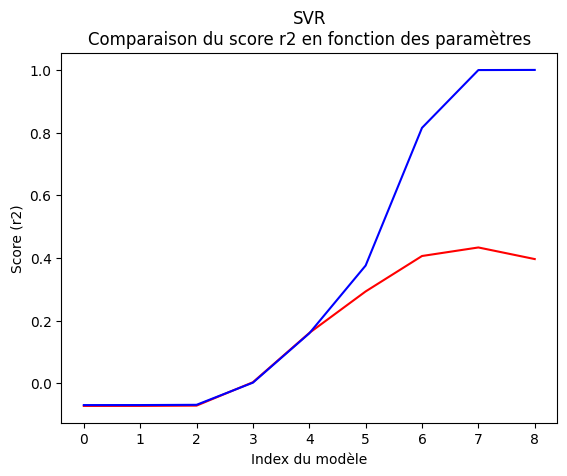

In [28]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("SVR\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_SVR_score.png", dpi=300)

# Ridge

In [29]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Ridge())])

param_grid = {
    'model__alpha': [1e-3, 1e-1, 1e1, 1e3],
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.554771650092618
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BuildingType',
                                                   'PrimaryPropertyTy

In [30]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.061172,0.011659,0.011548,0.002172,0.001,{'model__alpha': 0.001},0.556075,0.337827,0.302522,0.398808,0.112135,3,0.810298,0.835163,0.821326,0.822262,0.010173
1,0.052425,0.005338,0.012507,0.002372,0.1,{'model__alpha': 0.1},0.554265,0.429410,0.312867,0.432181,0.098570,2,0.810130,0.833027,0.820797,0.821318,0.009355
2,0.023920,0.000178,0.012643,0.001605,10.0,{'model__alpha': 10.0},0.512801,0.692348,0.459166,0.554772,0.099715,1,0.747745,0.665056,0.703147,0.705316,0.033792
3,0.023469,0.002159,0.007318,0.001341,1000.0,{'model__alpha': 1000.0},0.303201,0.444661,0.419833,0.389231,0.061672,4,0.434995,0.362129,0.426806,0.407977,0.032591


In [31]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Ridge_result.csv", sep=";")

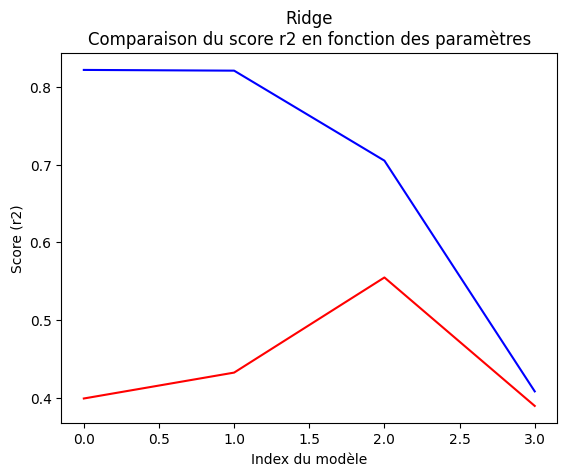

In [32]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("Ridge\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Ridge_score.png", dpi=300)

# Lasso

In [33]:
# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Lasso())])

param_grid = {
    'model__alpha': [1e-3, 1e-1, 1, 1e1, 1e3, 1e4, 1e5, 1e6, 1e8],
}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1, verbose=1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Get the results
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.5463603399502172
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BuildingType',
                                                   'PrimaryPropertyT

In [34]:
result = pd.DataFrame(grid_search.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.739275,0.077556,0.010042,0.000834,0.001,{'model__alpha': 0.001},0.558029,0.335143,0.302053,0.398408,0.113675,8,0.810299,0.835166,0.821327,0.822264,0.010174
1,0.812489,0.116034,0.011751,0.002932,0.1,{'model__alpha': 0.1},0.558030,0.335148,0.302053,0.398410,0.113674,7,0.810299,0.835166,0.821327,0.822264,0.010174
2,0.755765,0.086831,0.007897,0.002427,1,{'model__alpha': 1},0.558042,0.335195,0.302056,0.398431,0.113670,6,0.810299,0.835166,0.821327,0.822264,0.010174
3,0.792856,0.075800,0.012611,0.004661,10.0,{'model__alpha': 10.0},0.558126,0.335508,0.302121,0.398585,0.113633,5,0.810299,0.835166,0.821327,0.822264,0.010174
4,0.311519,0.108894,0.012225,0.003368,1000.0,{'model__alpha': 1000.0},0.558532,0.346750,0.313096,0.406126,0.108640,4,0.810092,0.834979,0.821183,0.822085,0.010180
5,0.056272,0.019145,0.010485,0.001323,10000.0,{'model__alpha': 10000.0},0.555035,0.404992,0.380231,0.446753,0.077231,3,0.802829,0.829232,0.815004,0.815689,0.010790
6,0.035356,0.007774,0.018169,0.009526,100000.0,{'model__alpha': 100000.0},0.527027,0.614699,0.497355,0.546360,0.049818,1,0.742288,0.756189,0.759437,0.752638,0.007438
7,0.026127,0.001080,0.010589,0.001238,1000000.0,{'model__alpha': 1000000.0},0.402972,0.639425,0.365050,0.469149,0.121395,2,0.574151,0.467530,0.540919,0.527533,0.044545
8,0.029529,0.002669,0.010306,0.003320,100000000.0,{'model__alpha': 100000000.0},-0.005213,-0.000568,-0.008960,-0.004914,0.003432,9,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
result.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Lasso_result.csv", sep=";")

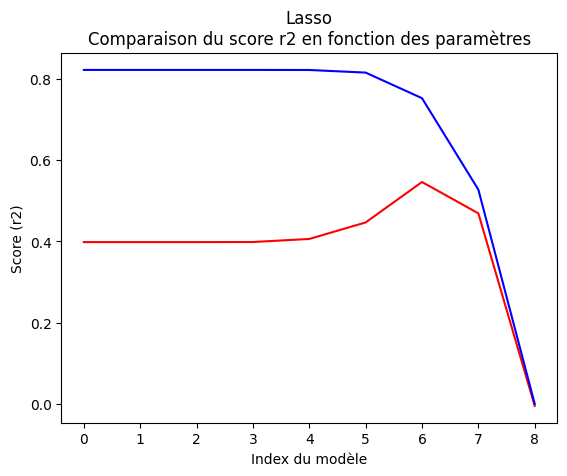

In [36]:
plt.plot(result["mean_test_score"], color="red")
plt.plot(result["mean_train_score"], color="blue")
plt.title("Lasso\nComparaison du score r2 en fonction des paramètres")
plt.ylabel("Score (r2)")
plt.xlabel("Index du modèle")
plt.savefig("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/v1_Lasso_score.png", dpi=300)

hyperopt, optuna -> 

Faire Grid search CV sur la pipeline (ajouter return_train_score = True)

In [2]:

Etudier l'importance des variables uniquement sur le meilleur model

feature_importance (local)

mettre dans la pipeline, à la place du standardScaler un powertransformer(choisi la meilleur transformation possible)

Garder les résultats des modèles (exporter csv avec résultat)



SyntaxError: unterminated string literal (detected at line 6) (190801153.py, line 6)